In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as opt
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
class Model(nn.Module):
    def __init__(self, hidden_size, x_size, y_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.x_size = x_size
        self.y_size = y_size
        
        self.Waa = nn.Linear(hidden_size, hidden_size)
        self.Wax = nn.Linear(x_size, hidden_size)
        self.g1 = nn.Tanh()
        self.g2 = nn.Softmax()
        
        self.Wya = nn.Linear(hidden_size, y_size)
    
    def forward(self, x, a):
        new_a = self.g1(self.Waa(a) + self.Wax(x))
        return self.g2(self.Wya(new_a)), new_a

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("ptb_text_only")

In [ ]:
all_chars = set()

for i in range(dataset['train'].num_rows):
    for c in dataset['train'][i]['sentence']:
        all_chars.add(c)

all_chars = list(all_chars)

In [ ]:
def make_tgrams(s):
    nums = [all_chars.index(c) for c in s]
    tgrams = []
    next_char = []
    for i in range(2, len(nums)):
        tgrams.append(nums[i - 2 : i])
        next_char.append(nums[i])
    return tgrams, next_char

In [ ]:
max_ind = 50

In [ ]:
def make_inp_and_out(tgram, ch):
    inp = torch.zeros(max_ind * 2)
    inp[tgram[0]] = 1
    inp[tgram[1] + max_ind] = 1
    out = torch.zeros(max_ind)
    out[ch] = 1
    return inp, out

In [ ]:
inputs = []
for i in tqdm(range(dataset['train'].num_rows)):
    curr_seq = []
    tgrams, ch = make_tgrams(dataset['train'][i]['sentence'])
    inputs.append(list(zip(tgrams, ch)))

  0%|          | 0/42068 [00:00<?, ?it/s]

In [37]:
from scipy.ndimage import gaussian_filter1d

hsize = 100
net = Model(hsize, max_ind * 2, max_ind)
optimizer = torch.optim.Adam(net.parameters())
losses = []

epochs = 1000
for i in tqdm(range(epochs)):
    curr_losses = []
    for inp in inputs[:100]:
        a = torch.randn(hsize)
        loss = 0

        for tgram, ch in inp:
            x, y = make_inp_and_out(tgram, ch)
            y_pred, a = net(x, a)
            loss += F.cross_entropy(y, y_pred)
        
        if loss != 0:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            curr_losses.append(loss.item())
    losses.append(curr_losses)

  0%|          | 0/1000 [00:00<?, ?it/s]

<ipython-input-2-74c28529d389>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.g2(self.Wya(new_a)), new_a


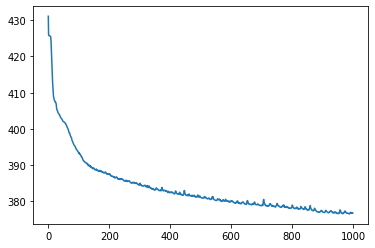

In [39]:
means = []
for ls in losses:
  means.append(sum(ls) / len(ls))
plt.plot(means)

In [154]:
def get_last_char(s):
  tgrams, chars = make_tgrams(s)
  a = torch.zeros(hsize)
  

  for tgram, ch in zip(tgrams, chars):
    x, y = make_inp_and_out(tgram, ch)
    y_pred, a = net(x, a)

  x, y = make_inp_and_out([tgrams[-1][1], chars[-1]], 0)

  ans, _ = net(x, a)

  return ans

In [156]:
str1 = "consolidat"
probs = get_last_char(str1).detach().numpy()
print(probs[all_chars.index('e')])

1.0


<ipython-input-2-74c28529d389>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.g2(self.Wya(new_a)), new_a


In [164]:
def get_most_prob(s):
  probs = get_last_char(s).detach().numpy()
  return all_chars[np.argmax(probs)]

In [208]:
get_most_prob("consolida")

<ipython-input-2-74c28529d389>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.g2(self.Wya(new_a)), new_a


't'

In [222]:
get_most_prob('millio')

<ipython-input-2-74c28529d389>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.g2(self.Wya(new_a)), new_a


'n'

In [220]:
get_most_prob('internatio')

<ipython-input-2-74c28529d389>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.g2(self.Wya(new_a)), new_a


'n'

In [232]:
get_most_prob('associatio')

<ipython-input-2-74c28529d389>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.g2(self.Wya(new_a)), new_a


'n'

In [233]:
get_most_prob('researche')

<ipython-input-2-74c28529d389>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.g2(self.Wya(new_a)), new_a


'r'

In [235]:
get_most_prob(' th')

<ipython-input-2-74c28529d389>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.g2(self.Wya(new_a)), new_a


'e'

In [237]:
get_most_prob('borrowin')

<ipython-input-2-74c28529d389>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.g2(self.Wya(new_a)), new_a


'g'